In [1]:
import pandas as pd

In [2]:
marks_df = pd.read_csv('marks.csv')
marks_df

,study_time,Marks
0,600,90
1,550,88
2,500,85
3,450,77
4,400,71
5,350,67


In [3]:
y = marks_df['Marks']
y

0    90
1    88
2    85
3    77
4    71
5    67
Name: Marks, dtype: int64

In [10]:
X = marks_df[['study_time']]
X

,study_time
0,600
1,550
2,500
3,450
4,400
5,350


In [12]:
X.shape

(6, 1)

In [14]:
from sklearn.linear_model import LinearRegression

In [16]:
linear = LinearRegression()

In [18]:
linear.fit(X, y)

LinearRegression()

In [20]:
linear.predict([[350]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([67.23809524])

In [22]:
y_pred = linear.predict(X)

In [24]:
import matplotlib.pyplot as plt

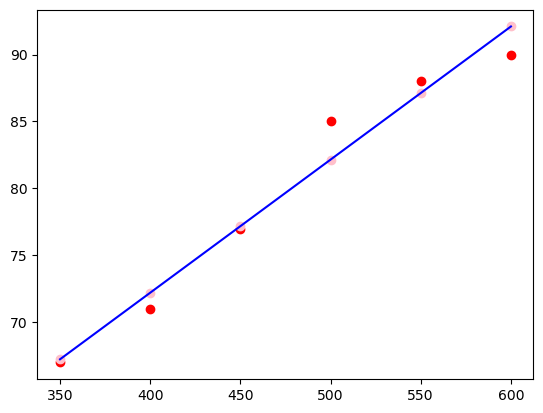

In [36]:
plt.scatter(X, y, c = "red")
plt.scatter(X, y_pred, c = "pink")
plt.plot(X, y_pred, c = "blue")

In [30]:
linear.predict([[475]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([79.66666667])

In [32]:
linear.coef_

array([0.09942857])

In [34]:
linear.intercept_

32.43809523809524

In [38]:
# now next csv

In [42]:
# seperate dependent variable
y = student_df['Performance Index']
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [46]:
# Seperate Independent Variable.
X = student_df.drop(columns = ['Performance Index'])
X['Extracurricular Activities'] = X['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [57]:
# split training set and testing set

from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [87]:
X_train.shape, y_train.shape

((8000, 5), (8000,))

In [93]:
# train the model
linear.fit(X_train, y_train)

LinearRegression()

In [97]:
y_pred = linear.predict(X_test)
y_pred

array([54.71185392, 22.61551294, 47.90314471, ..., 16.79341955,
       63.34327368, 45.94262301])

In [101]:
y_test

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
6412    45.0
8285    66.0
7853    16.0
1095    65.0
6929    47.0
Name: Performance Index, Length: 2000, dtype: float64

In [115]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [119]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [129]:
print("The mean squared error is:", mse)
print("The root mean squared error is:", rmse)
print("The r2 score is:", r2*100)

The mean squared error is: 4.082628398521858
The root mean squared error is: 2.0205515085050068
The r2 score is: 98.89832909573146


In [125]:
linear.coef_

array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144])

In [131]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearch

In [133]:
ridge = Ridge(alpha = 0)

In [135]:
ridge.fit(X_train, y_train)

Ridge(alpha=0)

In [137]:
y_pred = ridge.predict(X_test)